# Data analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from assignment_2.digits_classifiers.utils import chunks, plot_digit
from assignment_2.digits_classifiers.io.read_datasets import read_datasets

In [24]:
X, y = read_datasets()
SIZE = 28

Reading datasets


In [25]:
X.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y.head(10)

,class
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3
8,1
9,4


In [27]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


## Visualizing data

In [28]:
def plot(row_idx: int, save: bool = False, file_name = 'image.png'):
    pixels = chunks(lst=list(X.iloc[row_idx,:].values), n=SIZE)
    plot_digit(pixels=pixels, save=save, file_name=file_name)

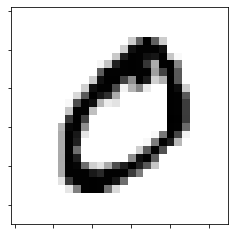

In [30]:
plot(row_idx=1, save=True, file_name='0.png')

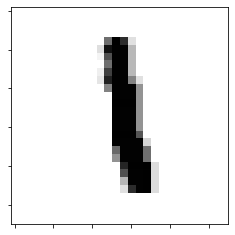

In [31]:
plot(row_idx=6, save=True, file_name='1.png')

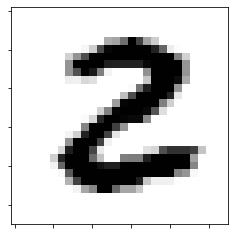

In [32]:
plot(row_idx=25, save=True, file_name='2.png')

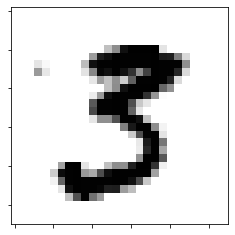

In [33]:
plot(row_idx=49, save=True, file_name='3.png')

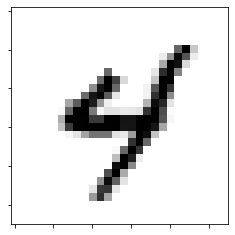

In [34]:
plot(row_idx=115, save=True, file_name='4.png')

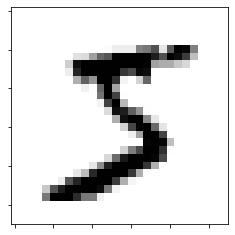

In [35]:
plot(row_idx=0, save=True, file_name='5.png')

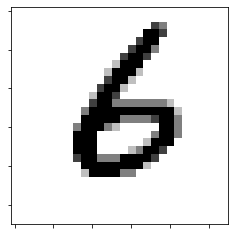

In [36]:
plot(row_idx=66, save=True, file_name='6.png')

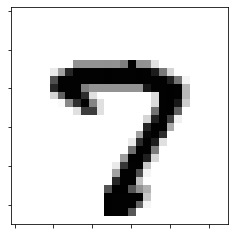

In [37]:
plot(row_idx=52, save=True, file_name='7.png')

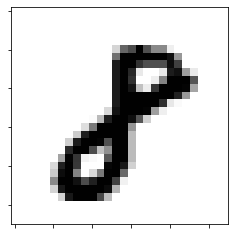

In [38]:
plot(row_idx=31, save=True, file_name='8.png')

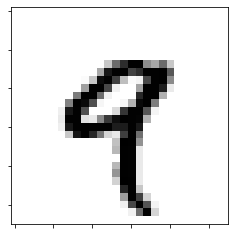

In [39]:
plot(row_idx=4, save=True, file_name='9.png')

## Feature selection

Look for pixels that are 0 in each of 70000 images.

In [40]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [41]:
len(always_zero)

65

We can drop 65 informationless columns

In [42]:
X.drop(columns=always_zero, axis=1, inplace=True)